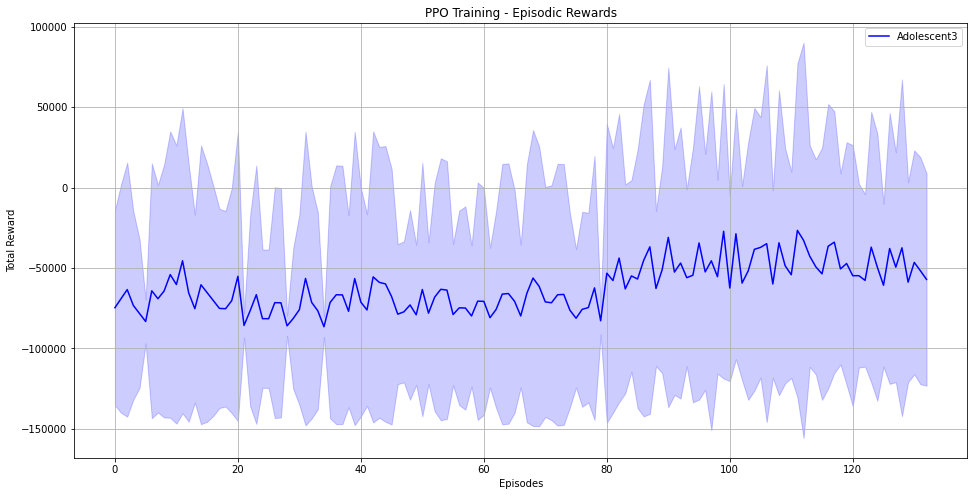

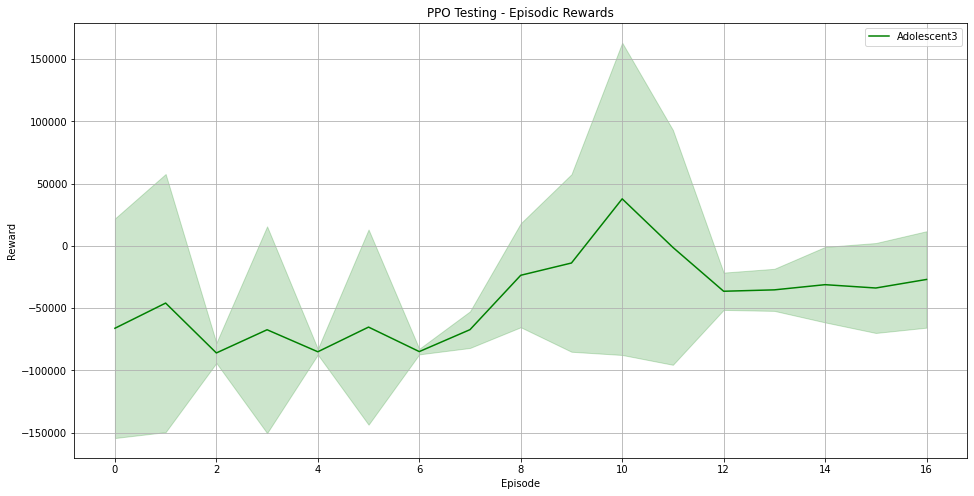

In [503]:
from debug_visualiser import get_debug_info
from matplotlib import pyplot as plt
import matplotlib.gridspec
import numpy as np
import pandas as pd
import json
%matplotlib inline

MAIN_PATH = '../results/fully_connect_network_2/'
with open(MAIN_PATH + 'args.json') as json_file:
    args = json.load(json_file)

training_workers = args['n_training_workers']
testing_workers = args['n_testing_workers']
training_seeds = [x for x in range(0, training_workers)]
testing_seeds = [500+x for x in range(0, testing_workers)]


def get_avg(path, seeds, filename, column):
    path = path + filename
    cur_length, full_arr, refined = [], [], []
    FILES = [ path + str(seed)+'.csv' for seed in seeds]
    for file in FILES:
        reward_summary = pd.read_csv(file)
        cur_length.append(reward_summary.shape[0])
        full_arr.append(reward_summary[column])
    for x in full_arr:
        refined.append(x[0:min(cur_length)])
    data = pd.concat(refined, axis=1)
    data['mean'] = data.mean(axis=1)
    data['std_dev'] = data.std(axis=1)
    return data

#### print the training episode rewards
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111)
data = get_avg(MAIN_PATH, training_seeds, '/training/data/reward_summary_', 'reward')
mstd = data['std_dev']
ma = data['mean'] 
ax.plot(ma, '-b', label="Adolescent3")
ax.fill_between(mstd.index, ma - 2 * mstd, ma + 2 * mstd, color="b", alpha=0.2)

ax.grid()
ax.set_title('PPO Training - Episodic Rewards')
ax.set_xlabel('Episodes')
ax.set_ylabel('Total Reward')
ax.legend(loc="upper right")
plt.show()

#### print the testing episode rewards
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111)
data = get_avg(MAIN_PATH, testing_seeds, '/testing/data/testing_episode_summary_', 'reward')
mstd = data['std_dev']
ma = data['mean'] 
ax.plot(ma, '-g', label="Adolescent3")
ax.fill_between(mstd.index, ma - 2 * mstd, ma + 2 * mstd, color="g", alpha=0.2)

ax.grid()
ax.set_title('PPO Testing - Episodic Rewards')
ax.set_xlabel('Episode')
ax.set_ylabel('Reward')
ax.legend(loc="upper right")
plt.show()




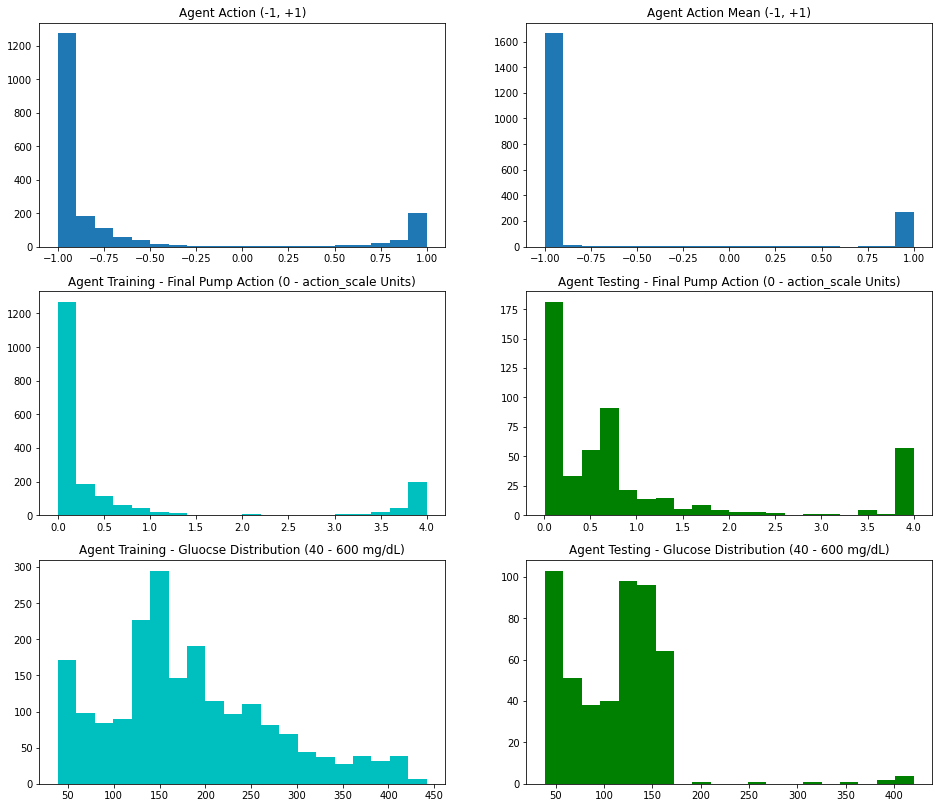

In [495]:
#### action history.... 

def get_concat(path, seeds, filename, column):
    path = path + filename
    full_arr, refined = [], []
    FILES = [ path + str(seed)+'.csv' for seed in seeds]
    for file in FILES:
        d = pd.read_csv(file)
        full_arr.append(d[column][-100:])
    data = pd.concat(full_arr, axis=0)
    return data

fig = plt.figure(figsize=(16, 14))
ax = fig.add_subplot(321)
ax1 = fig.add_subplot(322)
ax2 = fig.add_subplot(323)
ax3 = fig.add_subplot(324)
ax4 = fig.add_subplot(325)
ax5 = fig.add_subplot(326)

data1 = get_concat(MAIN_PATH, training_seeds, 'training/data/action_summary_', 'action')
ax.hist(data1, bins = 20)
ax.set_title('Agent Action (-1, +1)')

data2 = get_concat(MAIN_PATH, training_seeds, 'training/data/action_summary_', 'mean')
ax1.hist(data2, bins = 20)
ax1.set_title('Agent Action Mean (-1, +1)')

data3 = get_concat(MAIN_PATH, training_seeds, 'training/data/action_summary_', 'pump_action')
ax2.hist(data3, bins = 20, color = 'c')
ax2.set_title('Agent Training - Final Pump Action (0 - action_scale Units)')

data4 = get_concat(MAIN_PATH, testing_seeds, 'testing/data/test_action_summary_', 'pump_action')
ax3.hist(data4, bins = 20, color = 'g')
ax3.set_title('Agent Testing - Final Pump Action (0 - action_scale Units)')

data5 = get_concat(MAIN_PATH, training_seeds, 'training/data/action_summary_', 'glucose')
ax4.hist(data5, bins = 20, color = 'c')
ax4.set_title('Agent Training - Gluocse Distribution (40 - 600 mg/dL)')

data6 = get_concat(MAIN_PATH, testing_seeds, 'testing/data/test_action_summary_', 'glucose')
ax5.hist(data6, bins = 20, color = 'g')
ax5.set_title('Agent Testing - Glucose Distribution (40 - 600 mg/dL)')

plt.show()


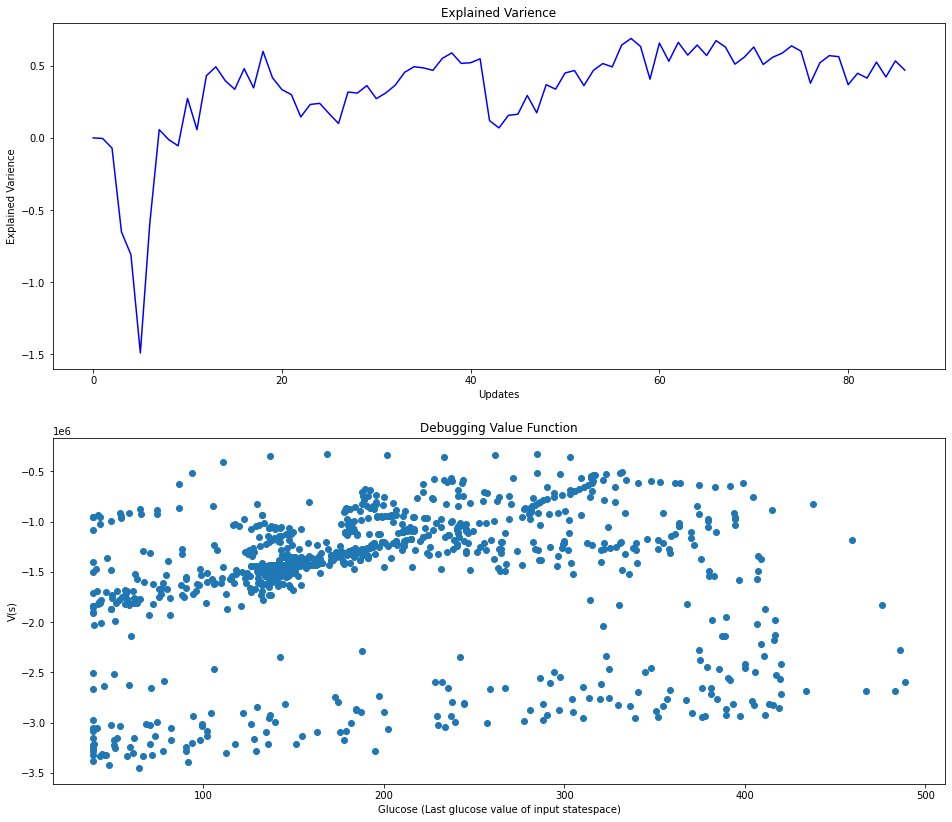

In [496]:
explained_var = pd.read_csv(MAIN_PATH + '/explained_var.csv')
fig = plt.figure(figsize=(16, 14))
ax = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax.plot(explained_var, '-b', label="explained_var")
ax.set_title('Explained Varience')
ax.set_xlabel('Updates')
ax.set_ylabel('Explained Varience')

def get_concat_recent(path, seeds, filename, column):
    path = path + filename
    full_arr, refined = [], []
    FILES = [ path + str(seed)+'.csv' for seed in seeds]
    for file in FILES:
        d = pd.read_csv(file)
        full_arr.append(d[column][-48:])
    data = pd.concat(full_arr, axis=0)
    return data

data_glucose = get_concat_recent(MAIN_PATH, training_seeds, 'training/data/action_summary_', 'glucose')
data_state_val = get_concat_recent(MAIN_PATH, training_seeds, 'training/data/action_summary_', 'state_value')
ax2.scatter(data_glucose, data_state_val)
ax2.set_title('Debugging Value Function')
ax2.set_xlabel('Glucose (Last glucose value of input statespace)')
ax2.set_ylabel('V(s)')
plt.show()


In [ ]:

selected_seed = training_seeds[0:1]
ax3.plot(data_glucose)
temp = [0] * 1000
temp[24:] = data_state_val[-24:]
print(temp)

plt.show()

In [ ]:
# print the testing episode rewards
# fig = plt.figure(figsize=(16, 10))
# ax = fig.add_subplot(111)
# data = get_avg(MAIN_PATH, testing_seeds, '/testing/data/testing_episode_summary_', 'ri')
# mstd = data['std_dev']
# ma = data['mean'] 
# ax.plot(ma, '-b', label="RI")
# ax.fill_between(mstd.index, ma - 2 * mstd, ma + 2 * mstd, color="b", alpha=0.2)

# data = get_avg(MAIN_PATH, testing_seeds, '/testing/data/testing_episode_summary_', 'normo')
# mstd = data['std_dev']
# ma = data['mean'] 
# ax.plot(ma, '-g', label="Time in Target Glucose Range")
# ax.fill_between(mstd.index, ma - 2 * mstd, ma + 2 * mstd, color="g", alpha=0.2)

# ax.grid()
# ax.set_title('PPO Testing - Episodic Rewards')
# ax.set_xlabel('Episode')
# ax.set_ylabel('Reward')
# ax.legend(loc="upper right")
# plt.show()